<a href="https://colab.research.google.com/github/dphi-official/Deep_Learning_Bootcamp/blob/master/Tensor_Operations/DL_Day3_Optional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Tensors

In [ ]:
import tensorflow as tf
import numpy as np

Tensors are multi-dimensional arrays with a uniform type (called a `dtype`).  You can see all supported `dtypes` at `tf.dtypes.DType`.

If you're familiar with [NumPy](https://numpy.org/devdocs/user/quickstart.html), tensors are (kind of) like `np.arrays`.

All tensors are immutable like Python numbers and strings: you can never update the contents of a tensor, only create a new one.


## Basics

Before creating basic tensors, let's understand some basics. 

### Scalar, Vector, Matrix 101


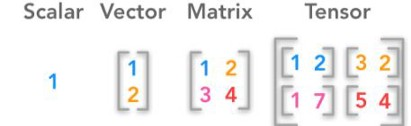

* A scalar is a single number
* A vector is an array of numbers.
* A matrix is a 2-D array
* A tensor is a n-dimensional array with n >2



###  Understanding Dimension - Rank - Axes - Shape - Indexes

Dimension: Let’s take an example of box to explain this. A simple box three dimensions width, length and depth (or height). Similarly, in data science we working “N” dimensional datasets. “N” could be any number.


Indexes: 


Rank:


The rank of a tensor refers to the number of dimensions present within the tensor.



### Scalar  - Rank 0 Tensor
A scalar contains a single value, and no "axes".

In [ ]:
# This will be an int32 tensor by default; see "dtypes" below.
rank_0_tensor = tf.constant(4)
print(rank_0_tensor)

tf.Tensor(4, shape=(), dtype=int32)


### Vector - Rank 1 Tensor
A "vector" or "rank-1" tensor is like a list of values. A vector has 1-axis:

In [ ]:
# Let's make this a float tensor.
rank_1_tensor = tf.constant([2.0, 3.0, 4.0])
print(rank_1_tensor)

tf.Tensor([2. 3. 4.], shape=(3,), dtype=float32)


### Matrix - Rank 2 Tensor
A "matrix" or "rank-2" tensor has 2-axes:

In [ ]:
# If we want to be specific, we can set the dtype (see below) at creation time
rank_2_tensor = tf.constant([[1, 2],
                             [3, 4],
                             [5, 6]], dtype=tf.float16)
print(rank_2_tensor)

tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float16)


<table>
<tr>
  <th>A scalar, shape: <code>[]</code></th>
  <th>A vector, shape: <code>[3]</code></th>
  <th>A matrix, shape: <code>[3, 2]</code></th>
</tr>
<tr>
  <td>
   <img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/scalar.png?raw=1" alt="A scalar, the number 4" />
  </td>

  <td>
   <img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/vector.png?raw=1" alt="The line with 3 sections, each one containing a number."/>
  </td>
  <td>
   <img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/matrix.png?raw=1" alt="A 3x2 grid, with each cell containing a number.">
  </td>
</tr>
</table>


### Tensors with 3 axes - Rank 3 Tensor
Tensors may have more axes, here is a tensor with 3-axes:

In [ ]:
# There can be an arbitrary number of
# axes (sometimes called "dimensions")
rank_3_tensor = tf.constant([
                            [[0, 1, 2, 3, 4],
                            [5, 6, 7, 8, 9]],
                            [[10, 11, 12, 13, 14],
                            [15, 16, 17, 18, 19]],
                            [[20, 21, 22, 23, 24],
                            [25, 26, 27, 28, 29]],])

print(rank_3_tensor)

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


There are many ways you might visualize a tensor with more than 2-axes.

<table>
<tr>
  <th colspan=3>A 3-axis tensor, shape: <code>[3, 2, 5]</code></th>
<tr>
<tr>
  <td>
   <img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/3-axis_numpy.png?raw=1"/>
  </td>
  <td>
   <img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/3-axis_front.png?raw=1"/>
  </td>

  <td>
   <img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/3-axis_block.png?raw=1"/>
  </td>
</tr>

</table>

## Tensor to Numpy Array
You can convert a tensor to a NumPy array either using `np.array` or the `tensor.numpy` method:

In [ ]:
np.array(rank_2_tensor)

array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float16)

In [ ]:
rank_2_tensor.numpy()

array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float16)

## Other types of Tensors
Tensors often contain floats and ints, but have many other types, including:

* complex numbers
* strings

The base `tf.Tensor` class requires tensors to be "rectangular"---that is, along each axis, every element is the same size.  However, there are specialized types of tensors that can handle different shapes:

* Ragged tensors (see [RaggedTensor](#ragged_tensors) below)
* Sparse tensors (see [SparseTensor](#sparse_tensors) below)

## Maths on Tensors
We can do basic math on tensors, including addition, element-wise multiplication, and matrix multiplication.

In [ ]:
a = tf.constant([[1, 2],
                 [3, 4]])
b = tf.constant([[1, 1],
                 [1, 1]]) # Could have also said `tf.ones([2,2])`

print(tf.add(a, b), "\n")
print(tf.multiply(a, b), "\n")
print(tf.matmul(a, b), "\n")

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



In [ ]:
print(a + b, "\n") # element-wise addition
print(a * b, "\n") # element-wise multiplication
print(a @ b, "\n") # matrix multiplication

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



## About shapes

Tensors have shapes.  Some vocabulary:

* **Shape**: The length (number of elements) of each of the dimensions of a tensor.
* **Rank**: Number of tensor dimensions.  A scalar has rank 0, a vector has rank 1, a matrix is rank 2.
* **Axis** or **Dimension**: A particular dimension of a tensor.
* **Size**: The total number of items in the tensor, the product shape vector


Note: Although you may see reference to a "tensor of two dimensions", a rank-2 tensor does not usually describe a 2D space.

Tensors and `tf.TensorShape` objects have convenient properties for accessing these:

In [ ]:
rank_4_tensor = tf.zeros([3, 2, 4, 5])

<table>
<tr>
  <th colspan=2>A rank-4 tensor, shape: <code>[3, 2, 4, 5]</code></th>
</tr>
<tr>
  <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/shape.png?raw=1" alt="A tensor shape is like a vector.">
    <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/4-axis_block.png?raw=1" alt="A 4-axis tensor">
  </td>
  </tr>
</table>


In [ ]:
print("Type of every element:", rank_4_tensor.dtype)
print("Number of dimensions:", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0])
print("Elements along the last axis of tensor:", rank_4_tensor.shape[-1])
print("Total number of elements (3*2*4*5): ", tf.size(rank_4_tensor).numpy())

Type of every element: <dtype: 'float32'>
Number of dimensions: 4
Shape of tensor: (3, 2, 4, 5)
Elements along axis 0 of tensor: 3
Elements along the last axis of tensor: 5
Total number of elements (3*2*4*5):  120


While axes are often referred to by their indices, you should always keep track of the meaning of each.
<table>
<tr>
<th>Typical axis order</th>
</tr>
<tr>
    <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/shape2.png?raw=1" alt="Keep track of what each axis is. A 4-axis tensor might be: Batch, Width, Height, Freatures">
  </td>
</tr>
</table>

## Indexing

### Single-axis indexing

TensorFlow follows standard Python indexing rules, similar to [indexing a list or a string in Python](https://docs.python.org/3/tutorial/introduction.html#strings), and the basic rules for NumPy indexing.

* indexes start at `0`
* negative indices count backwards from the end
* colons, `:`, are used for slices: `start:stop:step`


In [ ]:
rank_1_tensor = tf.constant([0, 1, 1, 2, 3, 5, 8, 13, 21, 34])
print(rank_1_tensor.numpy())

[ 0  1  1  2  3  5  8 13 21 34]


Indexing with a scalar removes the dimension:

In [ ]:
print("First:", rank_1_tensor[0].numpy())
print("Second:", rank_1_tensor[1].numpy())
print("Last:", rank_1_tensor[-1].numpy())

First: 0
Second: 1
Last: 34


Indexing with a `:` slice keeps the dimension:

In [ ]:
print("Everything:", rank_1_tensor[:].numpy())
print("Before 4:", rank_1_tensor[:4].numpy())
print("From 4 to the end:", rank_1_tensor[4:].numpy())
print("From 2, before 7:", rank_1_tensor[2:7].numpy())
print("Every other item:", rank_1_tensor[::2].numpy())
print("Reversed:", rank_1_tensor[::-1].numpy())

Everything: [ 0  1  1  2  3  5  8 13 21 34]
Before 4: [0 1 1 2]
From 4 to the end: [ 3  5  8 13 21 34]
From 2, before 7: [1 2 3 5 8]
Every other item: [ 0  1  3  8 21]
Reversed: [34 21 13  8  5  3  2  1  1  0]


### Multi-axis indexing

Higher rank tensors are indexed by passing multiple indices.

The single-axis exact same rules as in  the single-axis case apply to each axis independently.

In [ ]:
print(rank_2_tensor.numpy())

[[1. 2.]
 [3. 4.]
 [5. 6.]]


Passing an integer for each index the result is a scalar.

In [ ]:
# Pull out a single value from a 2-rank tensor
print(rank_2_tensor[1, 1].numpy())

4.0


You can index using any combination of integers and slices:

In [ ]:
# Get row and column tensors
print("Second row:", rank_2_tensor[1, :].numpy())
print("Second column:", rank_2_tensor[:, 1].numpy())
print("Last row:", rank_2_tensor[-1, :].numpy())
print("First item in last column:", rank_2_tensor[0, -1].numpy())
print("Skip the first row:")
print(rank_2_tensor[1:, :].numpy(), "\n")

Second row: [3. 4.]
Second column: [2. 4. 6.]
Last row: [5. 6.]
First item in last column: 2.0
Skip the first row:
[[3. 4.]
 [5. 6.]] 



Here is an example with a 3-axis tensor:

In [ ]:
print(rank_3_tensor[:, :, 4])

tf.Tensor(
[[ 4  9]
 [14 19]
 [24 29]], shape=(3, 2), dtype=int32)


<table>
<tr>
<th colspan=2>Selecting the last feature across all locations in each example in the batch </th>
</tr>
<tr>
    <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/index1.png?raw=1" alt="A 3x2x5 tensor with all the values at the index-4 of the last axis selected.">
  </td>
      <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/index2.png?raw=1" alt="The selected values packed into a 2-axis tensor.">
  </td>
</tr>
</table>

## Manipulating Shapes

Reshaping a tensor is of great utility. 



In [ ]:
# Shape returns a `TensorShape` object that shows the size on each dimension
var_x = tf.Variable(tf.constant([[1], [2], [3]]))
print(var_x.shape)

(3, 1)


In [ ]:
# You can convert this object into a Python list, too
print(var_x.shape.as_list())

[3, 1]


You can reshape a tensor into a new shape. The `tf.reshape` operation is fast and cheap as the underlying data does not need to be duplicated.

In [ ]:
# We can reshape a tensor to a new shape.
# Note that we're passing in a list
reshaped = tf.reshape(var_x, [1, 3])

In [ ]:
print(var_x.shape)
print(reshaped.shape)

(3, 1)
(1, 3)


The data maintains its layout in memory and a new tensor is created, with the requested shape, pointing to the same data. TensorFlow uses C-style "row-major" memory ordering, where incrementing the rightmost index corresponds to a single step in memory.

In [ ]:
print(rank_3_tensor)

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


If you flatten a tensor you can see what order it is laid out in memory.

In [ ]:
# A `-1` passed in the `shape` argument says "Whatever fits".
print(tf.reshape(rank_3_tensor, [-1]))

tf.Tensor(
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29], shape=(30,), dtype=int32)


Typically the only reasonable uses of `tf.reshape` are to combine or split adjacent axes (or add/remove `1`s).

For this 3x2x5 tensor, reshaping to (3x2)x5 or 3x(2x5) are both reasonable things to do, as the slices do not mix:

In [ ]:
print(tf.reshape(rank_3_tensor, [3*2, 5]), "\n")
print(tf.reshape(rank_3_tensor, [3, -1]))

tf.Tensor(
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]], shape=(6, 5), dtype=int32) 

tf.Tensor(
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]], shape=(3, 10), dtype=int32)


<table>
<th colspan=3>
Some good reshapes.
</th>
<tr>
  <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/reshape-before.png?raw=1" alt="A 3x2x5 tensor">
  </td>
  <td>
  <img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/reshape-good1.png?raw=1" alt="The same data reshaped to (3x2)x5">
  </td>
  <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/reshape-good2.png?raw=1" alt="The same data reshaped to 3x(2x5)">
  </td>
</tr>
</table>


Reshaping will "work" for any new shape with the same total number of elements, but it will not do anything useful if you do not respect the order of the axes.

Swapping axes in `tf.reshape` does not work, you need `tf.transpose` for that. 


In [ ]:
# Bad examples: don't do this

# You can't reorder axes with reshape.
print(tf.reshape(rank_3_tensor, [2, 3, 5]), "\n") 

# This is a mess
print(tf.reshape(rank_3_tensor, [5, 6]), "\n")

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]

 [[15 16 17 18 19]
  [20 21 22 23 24]
  [25 26 27 28 29]]], shape=(2, 3, 5), dtype=int32) 

tf.Tensor(
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]], shape=(5, 6), dtype=int32) 



<table>
<th colspan=3>
Some bad reshapes.
</th>
<tr>
  <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/reshape-bad.png?raw=1" alt="You can't reorder axes, use tf.transpose for that">
  </td>
  <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/reshape-bad4.png?raw=1" alt="Anything that mixes the slices of data together is probably wrong.">
  </td>
  <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/reshape-bad2.png?raw=1" alt="The new shape must fit exactly.">
  </td>
</tr>
</table>

You may run across not-fully-specified shapes. Either the shape contains a `None` (a dimension's length is unknown) or the shape is `None` (the rank of the tensor is unknown).


## More on `DTypes`

To inspect a `tf.Tensor`'s data type use the `Tensor.dtype` property.

When creating a `tf.Tensor` from a Python object you may optionally specify the datatype.

If you don't, TensorFlow chooses a datatype that can represent your data. TensorFlow converts Python integers to `tf.int32` and Python floating point numbers to `tf.float32`. Otherwise TensorFlow uses the same rules NumPy uses when converting to arrays.

You can cast from type to type.

In [ ]:
the_f64_tensor = tf.constant([2.2, 3.3, 4.4], dtype=tf.float64)
the_f16_tensor = tf.cast(the_f64_tensor, dtype=tf.float16)
# Now, cast to an uint8 and lose the decimal precision
the_u8_tensor = tf.cast(the_f16_tensor, dtype=tf.uint8)
print(the_u8_tensor)

tf.Tensor([2 3 4], shape=(3,), dtype=uint8)


## tf.convert_to_tensor

Most object classes like NumPy's `ndarray`, `TensorShape`, Python lists, and `tf.Variable` will all get converted to Tensor automatically.

## Reference
https://www.tensorflow.org/guide/tensor